In [3]:
import sys
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

### Task 1
Написать программу, оценивающую значение машинного эпсилон для стандартных чисел с двойной точностью.
____

- Machine epsilon gives an upper bound on the relative error due to rounding in floating point arithmetic. (Wikipedia)
- Double-precision floating-point format is a computer number format, usually occupying 64 bits in computer memory; it represents a wide dynamic range of numeric values by using a floating radix point. (Wikipedia)
- According to Prof. Demmel, LAPACK, Scilab: $$MachineEps = -b^{-(p-1)}/2$$
- According to Prof. Higham; ISO C standard; C, C++ and Python language constants; Mathematica, MATLAB and Octave: $$MachineEps = -b^{-(p-1)}$$

As you can see, in Python machine epsilon is:

In [2]:
sys.float_info.epsilon

2.220446049250313e-16

Let's estimate it for integer, float and complex number.

In [3]:
def estimateMachineEps(func=float):
    machExp = func(1)
    step = 0
    while func(1)+func(machExp) != func(1):
        machExpTotal = machExp
        machExp = func(machExp) / func(2)
        step += 1
        print('Step %i: '%step, machExpTotal)
    return machExpTotal

In [4]:
estimateMachineEps(int)

Step 1:  1


1

In [5]:
estimateMachineEps(float)

Step 1:  1.0
Step 2:  0.5
Step 3:  0.25
Step 4:  0.125
Step 5:  0.0625
Step 6:  0.03125
Step 7:  0.015625
Step 8:  0.0078125
Step 9:  0.00390625
Step 10:  0.001953125
Step 11:  0.0009765625
Step 12:  0.00048828125
Step 13:  0.000244140625
Step 14:  0.0001220703125
Step 15:  6.103515625e-05
Step 16:  3.0517578125e-05
Step 17:  1.52587890625e-05
Step 18:  7.62939453125e-06
Step 19:  3.814697265625e-06
Step 20:  1.9073486328125e-06
Step 21:  9.5367431640625e-07
Step 22:  4.76837158203125e-07
Step 23:  2.384185791015625e-07
Step 24:  1.1920928955078125e-07
Step 25:  5.960464477539063e-08
Step 26:  2.9802322387695312e-08
Step 27:  1.4901161193847656e-08
Step 28:  7.450580596923828e-09
Step 29:  3.725290298461914e-09
Step 30:  1.862645149230957e-09
Step 31:  9.313225746154785e-10
Step 32:  4.656612873077393e-10
Step 33:  2.3283064365386963e-10
Step 34:  1.1641532182693481e-10
Step 35:  5.820766091346741e-11
Step 36:  2.9103830456733704e-11
Step 37:  1.4551915228366852e-11
Step 38:  7.2759576

2.220446049250313e-16

In [6]:
estimateMachineEps(complex)

Step 1:  (1+0j)
Step 2:  (0.5+0j)
Step 3:  (0.25+0j)
Step 4:  (0.125+0j)
Step 5:  (0.0625+0j)
Step 6:  (0.03125+0j)
Step 7:  (0.015625+0j)
Step 8:  (0.0078125+0j)
Step 9:  (0.00390625+0j)
Step 10:  (0.001953125+0j)
Step 11:  (0.0009765625+0j)
Step 12:  (0.00048828125+0j)
Step 13:  (0.000244140625+0j)
Step 14:  (0.0001220703125+0j)
Step 15:  (6.103515625e-05+0j)
Step 16:  (3.0517578125e-05+0j)
Step 17:  (1.52587890625e-05+0j)
Step 18:  (7.62939453125e-06+0j)
Step 19:  (3.814697265625e-06+0j)
Step 20:  (1.9073486328125e-06+0j)
Step 21:  (9.5367431640625e-07+0j)
Step 22:  (4.76837158203125e-07+0j)
Step 23:  (2.384185791015625e-07+0j)
Step 24:  (1.1920928955078125e-07+0j)
Step 25:  (5.960464477539063e-08+0j)
Step 26:  (2.9802322387695312e-08+0j)
Step 27:  (1.4901161193847656e-08+0j)
Step 28:  (7.450580596923828e-09+0j)
Step 29:  (3.725290298461914e-09+0j)
Step 30:  (1.862645149230957e-09+0j)
Step 31:  (9.313225746154785e-10+0j)
Step 32:  (4.656612873077393e-10+0j)
Step 33:  (2.328306436538

(2.220446049250313e-16+0j)

____

### Task 2
Привести пример функции, производную которой нельзя вычислить методом дифференцирования с комплексным шагом.
_____

Аналити́ческая функция вещественной переменной — функция, которая совпадает со своим рядом Тейлора в окрестности любой точки области определения.
Пример неаналитических функций на C – $$f(z) = |z|$$ поскольку данная функция не имеет комплексной производной ни в одной точке.

In [7]:
f = lambda x: np.abs(x)
g = lambda x: 1/np.abs(x)

In [8]:
def printFunction(testF, dotX, line):
    dotY = testF(dotX)
    x = np.linspace(-dotX,dotX*2, 1000, endpoint=True) 
    y = testF(x)

    plt.figure()
    plt.plot(x,y)
    plt.plot(dotX, dotY, 'o')

    plt.xlim((-dotX,dotX*2))
    plt.ylim((0, 6))

    plt.ylabel('f(x)')
    plt.xlabel('x')
    plt.annotate(xy=(0,5),s=line,fontsize=20)

    plt.plot()
    plt.show()

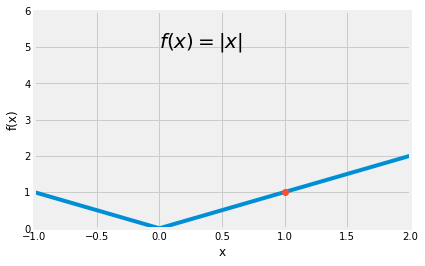

In [9]:
printFunction(f, 1, r'$f(x)=|x|$')

In [10]:
# The complex step approximation 
def df_pc(x, h):
    return np.imag(f(x + 1j*h))/h

def df_ff(x, h):
    return (f(x + h) - F(x))/h

# The centered finite difference approximation with step size h is
def df_pd(x, h):
    return (f(x + h) - f(x - h))/(2 * h)

def df_diff(x):
    return ((np.exp(x)*(np.cos(3*x) + np.sin(3*x)/2 + (3*np.sin(x))/2)) / 
            (np.cos(x)**3 + np.sin(x)**3)**2)

In [11]:
def complexStepDifferentiation(dotX, h_list):
    error_pcs = np.zeros(h_list.shape)
    error_pds = np.zeros(h_list.shape)
    error_ffs = np.zeros(h_list.shape)

    exact = df_diff(dotX)
    for i, h in enumerate(h_list):
        error_pcs[i] = np.abs(df_pc(dotX, h) - exact)
    #   /np.abs(exact)
        error_pds[i] = np.abs(df_pd(dotX, h) - exact)
    #     /np.abs(exact)
    #     error_ffs[i] = np.abs(df_ff(dotX, h) - exact)/np.abs(exact)

    plt.figure()
    plt.loglog(h_list, error_pcs, label='Complex step')
    # plt.loglog(h_list, error_ffs, label='Forward difference')
    plt.loglog(h_list, error_pds, label='Central-difference')

    plt.gca().invert_xaxis()
    plt.legend()
    plt.ylabel('Normalized error')
    plt.xlabel('Step size (h)')

    plt.show()

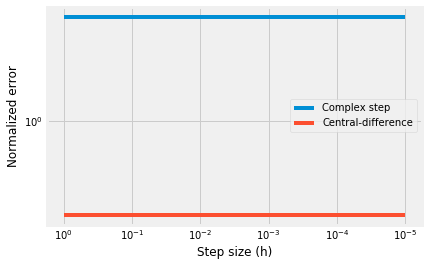

In [12]:
complexStepDifferentiation(1, np.logspace(-5,0,15, endpoint=True))

_______
### Task 3
Релизовать алгоритм вычисления первой производной методом дифференцирования с комплексным шагом. Для функции с известным значением производной, изучить сходимость численного ответа при уменьшении шага.
_____

Classic function for complex step differentiation: https://blogs.mathworks.com/cleve/2013/10/14/complex-step-differentiation/

In [13]:
f = lambda x: np.exp(x)/((np.cos(x))**3 + np.sin(x)**3)

Here's a plot over a portion of the 𝑥-axis, with a dot at 𝜋/4.

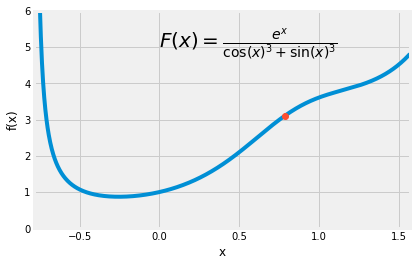

In [14]:
printFunction(f, np.pi/4, r'$F(x)=\frac{e^x}{\cos(x)^3+\sin(x)^3}$')

Now we can plot the error from computing the first derivative by complex step and finite differences.

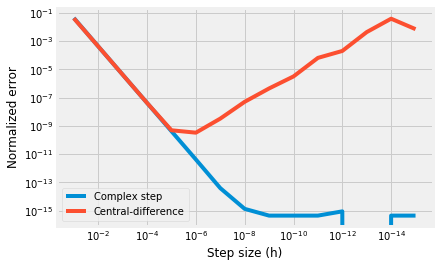

In [15]:
complexStepDifferentiation(np.pi/4, np.logspace(-15,-1,15, endpoint=True))

This confirms that complex step is accurate for small step sizes whereas the finite difference approach never achieves full accuracy.

_______
### Task 4 and Task 7
Прямым вычислением показать, что один шаг экстраполяции Ричардсона для центральной схемы вычисления первой производной воспроизводит явную форму разностной схемы порядка  $$O(h^4)$$
_____
(*) Релизовать алгоритм вычисления первой производной с помощью экстраполяции Ричардсона. Использовать стандартную центральную схему. Обсудить способы оценки погрешности вычислений и критерии остановки итерационного процесса.
___


    Richardson's Extrapolation to approximate  f'(x) at a particular x.
    
    Based on an algorithm in "Numerical Mathematics and Computing"
    4th Edition, by Cheney and Kincaid, Brooks-Cole, 1999. (page 169)
    
    RICHARDSON EXTRAPOLATION THEOREM
    The quantities D(n, m) defined in the Richardson extrapolation process (10) obey the equation 
    
    
$$D(n, m) = L + \sum\limits_{k=m+1}^{\infty} A(k,m)(\frac{h}{2^n})^{2k}$$
$$(0\leqq m\leqq n)$$

Данный алгоритм останавливается, когда пройдет два цикла. Первый – уровень экстраполяции, второй – от начального до текущего в алгоритме уровня d[i].

In [12]:
# f – function
# x - value of x to find derivative at
# n - number of levels of extrapolation
# h - initial stepsize

def richardson(f, x, n, h):
    # d[n,n] will contain the most accurate approximation to f'(x).
    d = np.array([[0] * (n + 1)] * (n + 1), dtype=float)
    
    for i in range(n + 1):
        d[i,0] = (f(x + h) - f(x - h))/(2 * h)

        power = 1  
        for j in range(1, i + 1):
            power *= 4
            d[i,j] = d[i,j-1] + (d[i,j-1] - d[i-1,j-1])/(power-1)
#             d[i,j] = (power * d[i,j-1] - d[i-1,j-1])/(power - 1)

        h = h/2
    return d

In [13]:
f = lambda x: x**2
f1 = lambda x: x**2 + 5* np.cos(x)
f2 = lambda x: x + 2 * x**5 - np.exp(x) * np.sin(x)

In [15]:
# two-dimensional array of extrapolation values.
# The [n,n] value of this array should be the most accurate estimate of f'(x).

# In practice, one can arrange the quantities in a two-dimensional triangular array

print(richardson(f, 1, 1, 0.1))
print(richardson(f1, 2, 1, 0.1))
print(richardson(f2, 2, 1, 0.1))

[[2. 0.]
 [2. 2.]]
[[-0.53891344  0.        ]
 [-0.544593   -0.54648619]]
[[158.18894069   0.        ]
 [157.56425737 157.35602959]]


____
### Task 5 
Написать программу, вычисляющую производную функции  $$x^{2}ln(x)$$ в точке <i>x = 0</i> с точностью $$O(h^2)$$
 ____

In [18]:
def f(x):
    if x == 0:
        return 0
    else:
        return x**2 * np.log(x)

In [16]:
f = lambda x: x**2 * np.log(x)
g = lambda x: x + 2*x*np.log(x)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


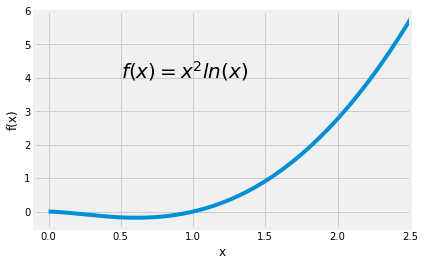

In [17]:
dotX = 0
dotY = f(0)
x = np.linspace(-1,3, 1000, endpoint=True) 
y = f(x)

plt.figure()
plt.plot(x,y)
plt.plot(dotX, dotY, 'o')

plt.xlim((-0.1,2.5))
plt.ylim((-0.5, 6))

plt.ylabel('f(x)')
plt.xlabel('x')
plt.annotate(xy=(0.5,4),s=r'$f(x) = x^{2}ln(x)$',fontsize=20)

plt.plot()
plt.show()

Односторонняя схема второго порядка для первой производной:

$$
f'(x) = \frac{ -\frac{3}{2} f(x) + 2 f(x+h) -\frac{1}{2} f(x + 2h) }{h} + O(h^2)
$$

Пусть $$f(x) = f(x + h) - f(h)$$ тогда

In [19]:
def deriv(f, x, h):
#     f_x = f(x + h) - (2*x + h + 2) * h 
    return (-1.5*f(x) + 2*f(x + h) - 0.5*f(x + 2*h))/h

In [ ]:
def deriv_

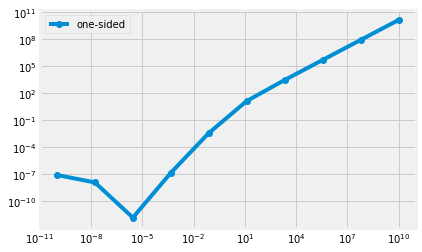

In [32]:
x = 1
if x == 0:
    exact = 0
else:
    exact = g(x)
    
hh = np.logspace(-10, 10, 10)

plt.loglog(hh, [abs(deriv(f, x, h) - exact) for h in hh],
           'o-', label='one-sided')
plt.legend(loc='best')

____
### Task 6
Написать программу, вычисляющую градиент функции N переменных.
_______

Если $$f(x_1,...,x_n)$$ функция <i>n</i> переменных x, то <i>n</i>-мерный вектор из частных производных 
$$grad\space f = (\frac{\partial f}{\partial x_1},...,\frac{\partial f}{\partial x_n})$$
назвается градиентом.

In [4]:
x,y,z = np.mgrid[-10:11:5., -10:11:5., -10:11:5.]

V = x**2 + 3*y - 4*z # just a random function for the potential

Ex,Ey,Ez = np.gradient(V)

In [5]:
Ex,Ey,Ez

(array([[[-75., -75., -75., -75., -75.],
         [-75., -75., -75., -75., -75.],
         [-75., -75., -75., -75., -75.],
         [-75., -75., -75., -75., -75.],
         [-75., -75., -75., -75., -75.]],
 
        [[-50., -50., -50., -50., -50.],
         [-50., -50., -50., -50., -50.],
         [-50., -50., -50., -50., -50.],
         [-50., -50., -50., -50., -50.],
         [-50., -50., -50., -50., -50.]],
 
        [[  0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.]],
 
        [[ 50.,  50.,  50.,  50.,  50.],
         [ 50.,  50.,  50.,  50.,  50.],
         [ 50.,  50.,  50.,  50.,  50.],
         [ 50.,  50.,  50.,  50.,  50.],
         [ 50.,  50.,  50.,  50.,  50.]],
 
        [[ 75.,  75.,  75.,  75.,  75.],
         [ 75.,  75.,  75.,  75.,  75.],
         [ 75.,  75.,  75.,  75.,  75.],
         [ 75.,  75.,  75.,  75.,  75.],
    

____

### Task 7
Solution in task 4.
_____